# **Importing Libraries for Data Analysis and Machine Learning**

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pickle
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Load Data & Exploratory Data Analysis (EDA)**

In [228]:
data = pd.read_csv('/content/waze_dataset.csv')
data

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB




1.   The dataframe contains categorical, text and numerical data (floats and integers) with 14,999 rows and 13 columns (12 feature & lable).

2.   The label column is missing 700 values.



In [230]:
data['label'].value_counts()

,count
label,
retained,11763
churned,2536


The dataset is imbalanced, with 82.5% of users retained and 17.5% churned.

In [231]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The following columns all seem to have outliers:

* sessions
* drives
* total_sessions
* total_navigations_fav1
* total_navigations_fav2
* driven_km_drives
* duration_minutes_drives

All of these columns have max values that are multiple standard deviations above the 75th percentile.This could indicate outliers in these variables.

In [232]:
null_recodes = data[data['label'].isnull()]
null_recodes.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [233]:
not_null_recodes = data[~data['label'].isnull()]
not_null_recodes.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The analysis of the two summary statistics tables reveals no significant differences, particularly in means and standard deviations. This consistency suggests that:



1.   The missing values may occur randomly, indicating no specific pattern or relationship with other data.

2.   The missing data might be unrelated to the available information.

3.   There is likely minimal bias introduced by the missing values, implying that excluding or imputing them may not significantly impact the dataset's overall distribution.



In [234]:
null_ratio = round((null_recodes.shape[0] / data.shape[0])*100,2)
print("Null ratio: {:.2f}%".format(null_ratio))

Null ratio: 4.67%


The null ratio is 4.67%, indicating that a small percentage of the data is missing.

In [235]:
data.dropna(inplace=True)

Drop all records with null values from the dataset, as we cannot fill them with the available information

In [236]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42,shuffle=True)

Split the dataset into training and testing sets
We allocate 20% of the data for testing and set a random seed for reproducibility.
The shuffle parameter ensures that the data is randomly shuffled before the split.

In [237]:
train_data.drop('ID', axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)

We will exclude the ID column from our dataset as it does not contribute to predicting churn.

In [238]:
device_per_label =train_data.groupby('label')['device'].value_counts()
device_per_label_retio = round(train_data.groupby('label')['device'].value_counts(normalize=True)*100,2)

print(device_per_label)
print()
print(device_per_label_retio)

label     device 
churned   iPhone     1298
          Android     715
retained  iPhone     6075
          Android    3351
Name: count, dtype: int64

label     device 
churned   iPhone     64.48
          Android    35.52
retained  iPhone     64.45
          Android    35.55
Name: proportion, dtype: float64


In [239]:
device_per_label_test =test_data.groupby('label')['device'].value_counts()
device_per_label_retio_test = round(test_data.groupby('label')['device'].value_counts(normalize=True)*100,2)

print(device_per_label_test)
print()
print(device_per_label_retio_test)

label     device 
churned   iPhone      347
          Android     176
retained  iPhone     1505
          Android     832
Name: count, dtype: int64

label     device 
churned   iPhone     66.35
          Android    33.65
retained  iPhone     64.40
          Android    35.60
Name: proportion, dtype: float64


In [240]:
medians_train = train_data.groupby('label').apply(lambda group: group.select_dtypes(include=np.number).median())
medians_train

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,59.0,50.0,165.908622,1343.0,85.0,11.0,3637.382205,1592.696424,8.0,6.0
retained,56.0,47.0,158.155689,1855.0,69.0,8.0,3465.357092,1458.224337,17.0,14.0


In [241]:
medians_test = test_data.groupby('label').apply(lambda group: group.select_dtypes(include=np.number).median())
medians_test

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,59.0,49.0,158.027220,1206.0,81.0,10.0,3876.015520,1673.754578,8.0,6.0
retained,56.0,47.0,154.568955,1795.0,65.0,9.0,3453.272693,1457.365896,18.0,14.0


In [242]:
print("(medians['driven_km_drives'] / medians['drives'])",round((medians_train['driven_km_drives'] / medians_train['drives']),2))
print()
print("(medians['driven_km_drives'] / medians['driving_days'])",round((medians_train['driven_km_drives'] / medians_train['driving_days']),2))
print()
print("(medians['drives'] / medians['driving_days'])",(round((medians_train['drives'] / medians_train['driving_days']),2)))

(medians['driven_km_drives'] / medians['drives']) label
churned     72.75
retained    73.73
dtype: float64

(medians['driven_km_drives'] / medians['driving_days']) label
churned     606.23
retained    247.53
dtype: float64

(medians['drives'] / medians['driving_days']) label
churned     8.33
retained    3.36
dtype: float64


In [243]:
print("(medians['driven_km_drives'] / medians['drives'])",round((medians_test['driven_km_drives'] / medians_test['drives']),2))
print()
print("(medians['driven_km_drives'] / medians['driving_days'])",round((medians_test['driven_km_drives'] / medians_test['driving_days']),2))
print()
print("(medians['drives'] / medians['driving_days'])",(round((medians_test['drives'] / medians_test['driving_days']),2)))

(medians['driven_km_drives'] / medians['drives']) label
churned     79.10
retained    73.47
dtype: float64

(medians['driven_km_drives'] / medians['driving_days']) label
churned     646.00
retained    246.66
dtype: float64

(medians['drives'] / medians['driving_days']) label
churned     8.17
retained    3.36
dtype: float64


In [244]:
def calculate_churn_percentage(data, attribute, min_value, median_value, max_value):
    """Calculate the churn percentage for the specified attribute at its minimum, median, and maximum values."""


    # Calculate churn percentage for min_value
    min_churn = (
        round(len(data.loc[(data[attribute] == min_value) & (data['label'] == 'churned')]) /
              len(data.loc[(data[attribute] == min_value)]) * 100, 2)
        if len(data.loc[(data[attribute] == min_value)]) > 0 else 0
    )

    # Calculate churn percentage for median_value
    median_churn = (
        round(len(data.loc[(data[attribute] == median_value) & (data['label'] == 'churned')]) /
              len(data.loc[(data[attribute] == median_value)]) * 100, 2)
        if len(data.loc[(data[attribute] == median_value)]) > 0 else 0
    )

    # Calculate churn percentage for max_value
    max_churn = (
        round(len(data.loc[(data[attribute] == max_value) & (data['label'] == 'churned')]) /
              len(data.loc[(data[attribute] == max_value)]) * 100, 2)
        if len(data.loc[(data[attribute] == max_value)]) > 0 else 0
    )

    return min_churn, median_churn, max_churn

Calculate churn percentages for each attribute

In [245]:
attributes = train_data.columns[1:-1]

train_churn_results = {}
test_churn_results = {}

for attribute in attributes:

    min_churn_train, median_churn_train, max_churn_train = calculate_churn_percentage(
        train_data,
        attribute,
        train_data[attribute].min(),
        train_data[attribute].median(),
        train_data[attribute].max()
    )

    train_churn_results[attribute] = (min_churn_train, median_churn_train, max_churn_train)

    min_churn_test, median_churn_test, max_churn_test = calculate_churn_percentage(
        test_data,
        attribute,
        test_data[attribute].min(),
        test_data[attribute].median(),
        test_data[attribute].max()
    )

    test_churn_results[attribute] = (min_churn_test, median_churn_test, max_churn_test)

print("Train Data Churn Percentages:")
for attribute, results in train_churn_results.items():
    print(f"{attribute}: Min: {results[0]}%  Median: {results[1]}%  Max: {results[2]}%")


print()

print("\nTest Data Churn Percentages:")
for attribute, results in test_churn_results.items():
    print(f"{attribute}: Min: {results[0]}%  Median: {results[1]}%  Max: {results[2]}%")

Train Data Churn Percentages:
sessions: Min: 14.94%  Median: 18.84%  Max: 100.0%
drives: Min: 14.77%  Median: 21.52%  Max: 100.0%
total_sessions: Min: 0.0%  Median: 100.0%  Max: 100.0%
n_days_after_onboarding: Min: 0.0%  Median: 0.0%  Max: 0.0%
total_navigations_fav1: Min: 16.62%  Median: 8.57%  Max: 0.0%
total_navigations_fav2: Min: 16.89%  Median: 26.09%  Max: 100.0%
driven_km_drives: Min: 0.0%  Median: 0.0%  Max: 0.0%
duration_minutes_drives: Min: 0.0%  Median: 0.0%  Max: 0.0%
activity_days: Min: 44.44%  Median: 12.13%  Max: 3.59%
driving_days: Min: 40.84%  Median: 15.66%  Max: 0.0%


Test Data Churn Percentages:
sessions: Min: 7.14%  Median: 14.29%  Max: 0.0%
drives: Min: 7.14%  Median: 15.0%  Max: 0.0%
total_sessions: Min: 0.0%  Median: 0%  Max: 0.0%
n_days_after_onboarding: Min: 100.0%  Median: 0.0%  Max: 0.0%
total_navigations_fav1: Min: 18.2%  Median: 0.0%  Max: 0.0%
total_navigations_fav2: Min: 18.9%  Median: 11.11%  Max: 0.0%
driven_km_drives: Min: 0.0%  Median: 0%  Max: 0.0%

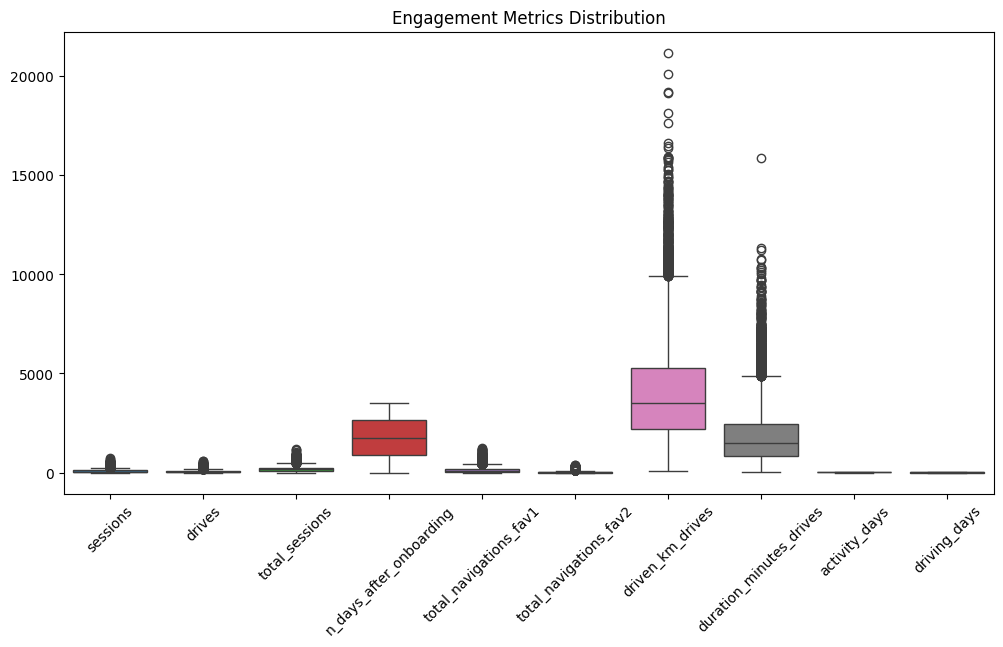

In [246]:
# Engagement Metrics Visualization
metrics = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
           'total_navigations_fav1', 'total_navigations_fav2',
           'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days']

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data[metrics])
plt.xticks(rotation=45)
plt.title('Engagement Metrics Distribution')
plt.show()


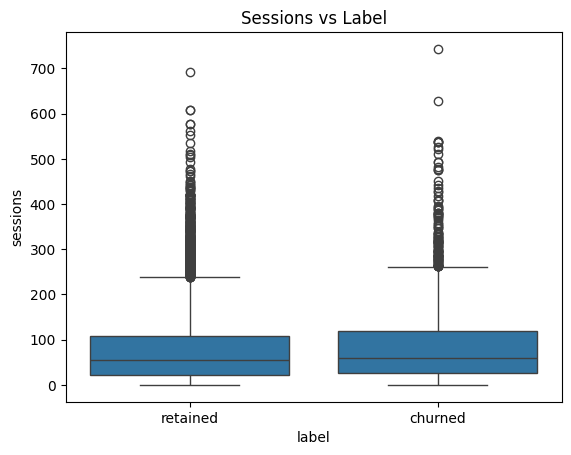

In [247]:
sns.boxplot(x='label', y='sessions', data=train_data)
plt.title('Sessions vs Label')
plt.show()

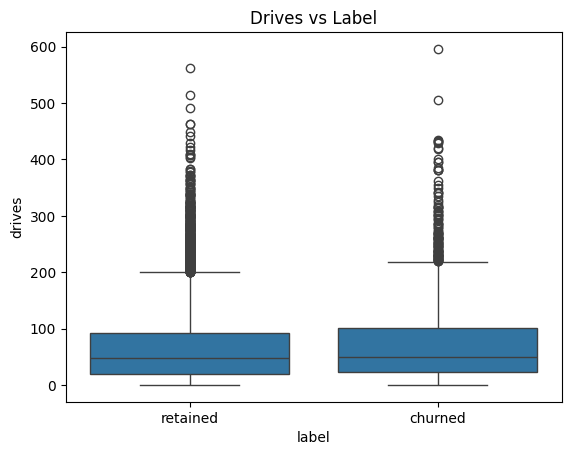

In [248]:
sns.boxplot(x='label', y='drives', data=train_data)
plt.title('Drives vs Label')
plt.show()

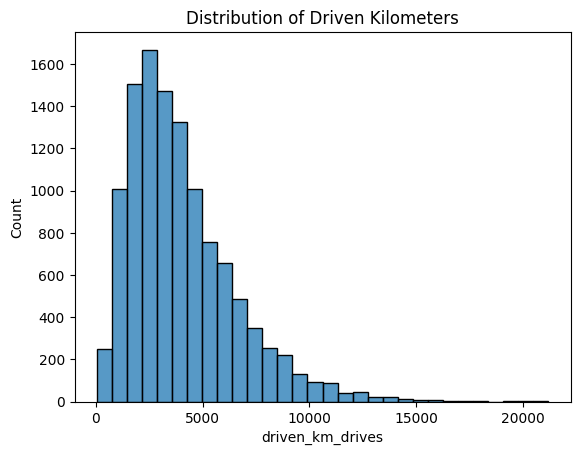

In [249]:
sns.histplot(train_data['driven_km_drives'], bins=30)
plt.title('Distribution of Driven Kilometers')
plt.show()

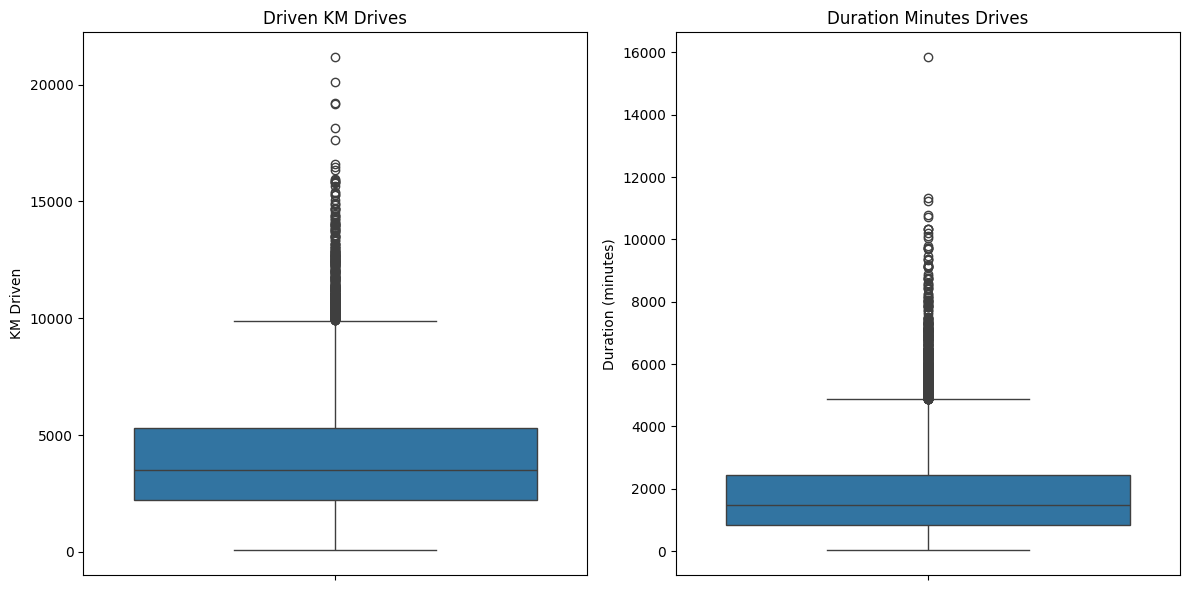

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=train_data['driven_km_drives'])
plt.title('Driven KM Drives')
plt.ylabel('KM Driven')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['duration_minutes_drives'])
plt.title('Duration Minutes Drives')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

In [251]:
train_data[train_data['sessions'] > train_data['sessions'].median()]['label'].value_counts(normalize=True)*100

,proportion
label,
retained,81.77193
churned,18.22807


In [252]:
train_data[train_data['total_navigations_fav1'] >= train_data['total_navigations_fav1'].median()]['label'].value_counts(normalize=True)*100

,proportion
label,
retained,81.097135
churned,18.902865


In [253]:
train_data[train_data['n_days_after_onboarding'] >= train_data['n_days_after_onboarding'].median()]['label'].value_counts(normalize=True)*100

,proportion
label,
retained,86.453417
churned,13.546583


In [254]:
train_data[train_data['drives'] <= train_data['drives'].median()]['label'].value_counts(normalize=True)*100

,proportion
label,
retained,83.050554
churned,16.949446


In [255]:
train_data[train_data['activity_days'] <= train_data['activity_days'].median()]['label'].value_counts(normalize=True)*100

,proportion
label,
retained,73.278146
churned,26.721854


In [256]:
train_data[train_data['driving_days'] <= train_data['driving_days'].median()]['label'].value_counts(normalize=True)*100

,proportion
label,
retained,72.823309
churned,27.176691


In [257]:
train_data['label'].value_counts(normalize=True)*100

,proportion
label,
retained,82.402308
churned,17.597692


# Create New Features

In [258]:
def segment_users(row, median_sessions,median_sessions_2,median_sessions_3,median_sessions_4):
    """ Segment users based on engagement levels"""
    if row['sessions'] > median_sessions and row['total_navigations_fav1'] >= median_sessions_2 and row['n_days_after_onboarding'] >= median_sessions_3 and row['drives']<=median_sessions_4:
        return 'High Engagement'
    else:
        return 'Low Engagement'

train_data['engagement_level'] = train_data.apply(segment_users, axis=1, args=(train_data['sessions'].median(),
                                                                               train_data['total_navigations_fav1'].median(),
                                                                               train_data['n_days_after_onboarding'].median(),
                                                                               train_data['drives'].median()))

test_data['engagement_level'] = test_data.apply(segment_users, axis=1, args=(test_data['sessions'].median(),
                                                                             test_data['total_navigations_fav1'].median(),
                                                                             test_data['n_days_after_onboarding'].median(),
                                                                             test_data['drives'].median()))


engagement_counts_train = train_data['engagement_level'].value_counts()
engagement_counts_test = test_data['engagement_level'].value_counts()

print("\nUser Engagement Levels:")
print(engagement_counts_train)


User Engagement Levels:
engagement_level
Low Engagement     11412
High Engagement       27
Name: count, dtype: int64


In [259]:
def segment_driving_days(row, median_sessions,median_sessions_2):
    """ Segment users based on day levels"""
    if row['activity_days'] <= median_sessions and row['driving_days'] <= median_sessions_2 :
        return 'High day'
    else:
        return 'Low day'

train_data['day_level'] = train_data.apply(segment_driving_days, axis=1, args=(train_data['activity_days'].median(),
                                                                      train_data['driving_days'].median()))

test_data['day_level'] = test_data.apply(segment_driving_days, axis=1, args=(test_data['activity_days'].median(),
                                                                    test_data['driving_days'].median()))


day_counts_train = train_data['day_level'].value_counts()
day_counts_test = test_data['day_level'].value_counts()

print("\nUser Day Levels:")
print(day_counts_train)


User Day Levels:
day_level
Low day     5995
High day    5444
Name: count, dtype: int64


In [260]:
train_data['activity_ratio'] = train_data['driving_days'] / train_data['activity_days'].replace(0, np.nan)
test_data['activity_ratio'] = test_data['driving_days'] / test_data['activity_days'].replace(0, np.nan)

train_data['avg_distance_per_drive'] = train_data['driven_km_drives'] / train_data['drives'].replace(0, np.nan)
test_data['avg_distance_per_drive'] = test_data['driven_km_drives'] / test_data['drives'].replace(0, np.nan)

train_data['engagement_ratio'] = train_data['total_sessions'] / train_data['driving_days'].replace(0, np.nan)
test_data['engagement_ratio'] = test_data['total_sessions'] / test_data['driving_days'].replace(0, np.nan)

train_data['avg_navigations_fav'] = (train_data['total_navigations_fav1'] + train_data['total_navigations_fav2']) / 2
test_data['avg_navigations_fav'] = (test_data['total_navigations_fav1'] + test_data['total_navigations_fav2']) / 2

train_data['activity_ratio'].fillna(train_data['activity_ratio'].median(), inplace=True)
test_data['activity_ratio'].fillna(test_data['activity_ratio'].median(), inplace=True)

train_data['avg_distance_per_drive'].fillna(train_data['avg_distance_per_drive'].median(), inplace=True)
test_data['avg_distance_per_drive'].fillna(test_data['avg_distance_per_drive'].median(), inplace=True)

train_data['avg_navigations_fav'].replace([np.inf, -np.inf], np.nan, inplace=True)
test_data['avg_navigations_fav'].replace([np.inf, -np.inf], np.nan, inplace=True)

train_data['engagement_ratio'].fillna(train_data['engagement_ratio'].median(), inplace=True)
test_data['engagement_ratio'].fillna(test_data['engagement_ratio'].median(), inplace=True)

train_data['avg_navigations_fav'].fillna(train_data['avg_navigations_fav'].median(), inplace=True)
test_data['avg_navigations_fav'].fillna(test_data['avg_navigations_fav'].median(), inplace=True)

* Total navigations combine total_navigations_fav1 and total_navigations_fav2.
* Engagement ratios normalize engagement metrics to reduce the impact of outliers.
* Driving metrics Create features like average distance per drive or average time per drive.
* Activity metrics use ratios like  driving_days / activity_days to assess user engagement.

In [261]:
train_data[['activity_ratio','avg_distance_per_drive','engagement_ratio', 'avg_navigations_fav']]

,activity_ratio,avg_distance_per_drive,engagement_ratio,avg_navigations_fav
12733,1.000000,89.746248,29.060498,126.0
8979,0.720000,230.983873,8.097366,10.0
11538,0.800000,71.322048,4.445741,88.0
11753,1.000000,129.781357,56.869835,117.0
13647,0.750000,32.503784,38.128011,22.5
...,...,...,...,...
5454,0.736842,43.722362,20.311083,0.0
14068,0.724138,182.018055,2.325030,20.0
5665,1.000000,21.110987,11.072382,44.0
895,0.500000,16.349703,35.551550,24.0


# Encoding Feature & Target Variable for Binary Classification

Next, we will encode the device & target variable label into binary format:

* Assign 0 for churned users ,  Android device, Low Engagement and Low day.
* Assign 1 for retained users, iPhone device, High  Engagement and High  day.

In [262]:
train_data['device']  = train_data['device'].map({'Android': 0, 'iPhone': 1})
test_data['device']  = test_data['device'].map({'Android': 0, 'iPhone': 1})

In [263]:
train_data['label'] = train_data['label'].map({'churned': 0, 'retained': 1})
test_data['label'] = test_data['label'].map({'churned': 0, 'retained': 1})

In [264]:
train_data['engagement_level'] = train_data['engagement_level'].map({'Low Engagement': 0, 'High Engagement': 1})
test_data['engagement_level'] = test_data['engagement_level'].map({'Low Engagement': 0, 'High Engagement': 1})
train_data['day_level'] = train_data['day_level'].map({'Low day': 0, 'High day': 1})
test_data['day_level'] = test_data['day_level'].map({'Low day': 0, 'High day': 1})

In [265]:
correlation_matrix = train_data.corr()
correlation_with_label = correlation_matrix['label'].abs().sort_values(ascending=False)

print("Correlation of features with 'label' (churned/retained):")
print(correlation_with_label)

Correlation of features with 'label' (churned/retained):
label                      1.000000
activity_days              0.304893
driving_days               0.296907
day_level                  0.267981
engagement_ratio           0.160791
n_days_after_onboarding    0.125256
activity_ratio             0.105865
avg_navigations_fav        0.061280
total_navigations_fav1     0.056771
drives                     0.045681
sessions                   0.045370
duration_minutes_drives    0.031658
total_sessions             0.031319
total_navigations_fav2     0.024590
engagement_level           0.013016
driven_km_drives           0.012521
avg_distance_per_drive     0.000273
device                     0.000250
Name: label, dtype: float64


In [266]:
correlation_matrix = test_data.corr()
correlation_with_label = correlation_matrix['label'].abs().sort_values(ascending=False)

print("Correlation of features with 'label' (churned/retained):")
print(correlation_with_label)

Correlation of features with 'label' (churned/retained):
label                      1.000000
activity_days              0.299990
driving_days               0.283918
day_level                  0.274379
n_days_after_onboarding    0.144470
engagement_ratio           0.136238
activity_ratio             0.070907
duration_minutes_drives    0.050817
total_navigations_fav1     0.050781
avg_navigations_fav        0.049434
driven_km_drives           0.044464
device                     0.015772
drives                     0.010742
sessions                   0.009665
avg_distance_per_drive     0.002787
total_navigations_fav2     0.002137
engagement_level           0.001922
total_sessions             0.000628
Name: label, dtype: float64


# Drop low corecorrelated lated feature

In [267]:
train_data.drop(['device'], axis=1, inplace=True)
test_data.drop(['device'], axis=1, inplace=True)

In [268]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

X_train

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,engagement_level,day_level,activity_ratio,avg_distance_per_drive,engagement_ratio,avg_navigations_fav
12733,77,77,232.483988,846,195,57,6910.461120,4604.745753,8,8,0,1,1.000000,89.746248,29.060498,126.0
8979,25,25,145.752582,1070,20,0,5774.596813,4444.164646,25,18,0,0,0.720000,230.983873,8.097366,10.0
11538,15,15,106.697795,905,174,2,1069.830723,615.840084,30,24,0,0,0.800000,71.322048,4.445741,88.0
11753,92,83,398.088846,2730,131,103,10771.852630,1187.541059,7,7,0,1,1.000000,129.781357,56.869835,117.0
13647,145,119,457.536134,1967,16,29,3867.950258,2810.682351,16,12,0,1,0.750000,32.503784,38.128011,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454,166,135,284.355168,2566,0,0,5902.518937,4697.663454,19,14,0,0,0.736842,43.722362,20.311083,0.0
14068,46,37,48.825640,2682,33,7,6734.668024,5366.471182,29,21,0,0,0.724138,182.018055,2.325030,20.0
5665,124,104,177.158110,964,88,0,2195.542662,767.992386,16,16,0,0,1.000000,21.110987,11.072382,44.0
895,198,198,213.309300,1062,15,33,3237.241263,1441.926177,12,6,0,1,0.500000,16.349703,35.551550,24.0


# **Normalization**

In [269]:
columns = ['total_navigations_fav1','total_navigations_fav2','total_sessions','driven_km_drives']

scaler = MinMaxScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

X_train['n_days_after_onboarding'] = (X_train['n_days_after_onboarding']/365).astype(float)
X_test['n_days_after_onboarding'] = (X_test['n_days_after_onboarding']/365).astype(float)

X_train['duration_minutes_drives'] = (X_train['duration_minutes_drives']/(60*24)).astype(float)
X_test['duration_minutes_drives'] = (X_test['duration_minutes_drives']/(60*24)).astype(float)

# **Feature Selection**

In [270]:
model = Lasso(alpha=0.005)
model.fit(X_train, y_train)

selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

with open('SelectFromModel.pkl', 'wb') as file:
    pickle.dump(selector, file)

selected_features = X_train.columns[selector.get_support()]
print(f"Selected features using Lasso: {selected_features}")

Selected features using Lasso: Index(['sessions', 'drives', 'n_days_after_onboarding',
       'duration_minutes_drives', 'activity_days', 'driving_days',
       'engagement_ratio', 'avg_navigations_fav'],
      dtype='object')


In [271]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# **Machine Learning Models**

Confusion Matrix:
 [[ 436   87]
 [1150 1187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.83      0.41       523
           1       0.93      0.51      0.66      2337

    accuracy                           0.57      2860
   macro avg       0.60      0.67      0.54      2860
weighted avg       0.81      0.57      0.61      2860

0.6707840697205403


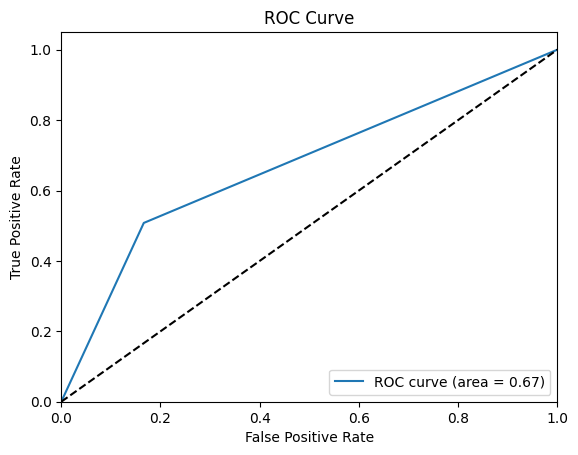

In [272]:
classifrt = LogisticRegression(random_state=42, class_weight={0: 11, 1: 3})
classifrt.fit(X_train, y_train)

y_pred = classifrt.predict_proba(X_test)[:, 1]
threshold = 0.68
y_pred = (y_pred > threshold).astype(int)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(classifrt, file)

fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.7367234716928028
Best threshold: 0.8496536252692826
Confusion Matrix:
 [[ 395  128]
 [ 922 1415]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.76      0.43       523
           1       0.92      0.61      0.73      2337

    accuracy                           0.63      2860
   macro avg       0.61      0.68      0.58      2860
weighted avg       0.80      0.63      0.67      2860



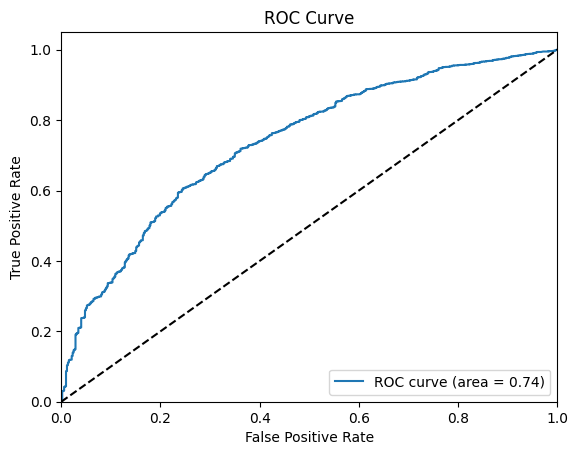

In [273]:
svm = SVC(random_state=42, class_weight={0: 16, 1: 3},probability=True)
svm.fit(X_train, y_train)

y_pred_proba = svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]
print("Best threshold:", best_threshold)

y_pred = (y_pred_proba > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.7122600022417654
Best threshold: 0.8
Confusion Matrix:
 [[ 354  169]
 [ 812 1525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.68      0.42       523
           1       0.90      0.65      0.76      2337

    accuracy                           0.66      2860
   macro avg       0.60      0.66      0.59      2860
weighted avg       0.79      0.66      0.69      2860



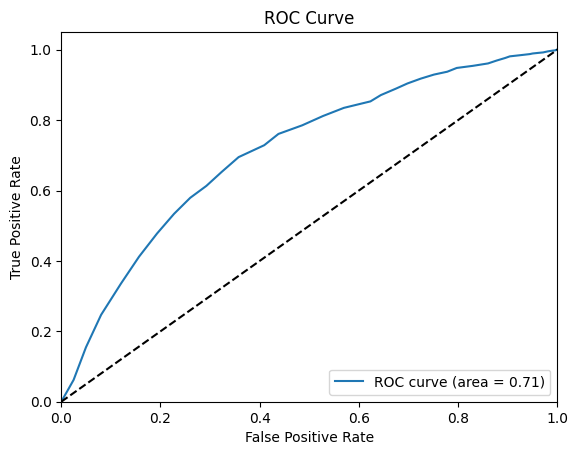

In [274]:
rf_classifier = RandomForestClassifier(random_state=42,n_estimators=50)
rf_classifier.fit(X_train, y_train)

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]
print("Best threshold:", best_threshold)

y_pred = (y_pred_proba > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [275]:
gb_classifier = GradientBoostingClassifier(random_state=42,subsample=0.8,learning_rate=0.7,loss="log_loss")
gb_classifier.fit(X_train, y_train)

y_peds = gb_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_peds)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_peds)
print("Classification Report:\n", report)


Confusion Matrix:
 [[ 106  417]
 [ 160 2177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.20      0.27       523
           1       0.84      0.93      0.88      2337

    accuracy                           0.80      2860
   macro avg       0.62      0.57      0.58      2860
weighted avg       0.76      0.80      0.77      2860



ROC AUC: 0.688422836225947
Best threshold: 0.8893045555653808
Confusion Matrix:
 [[ 387  136]
 [1033 1304]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.74      0.40       523
           1       0.91      0.56      0.69      2337

    accuracy                           0.59      2860
   macro avg       0.59      0.65      0.54      2860
weighted avg       0.79      0.59      0.64      2860



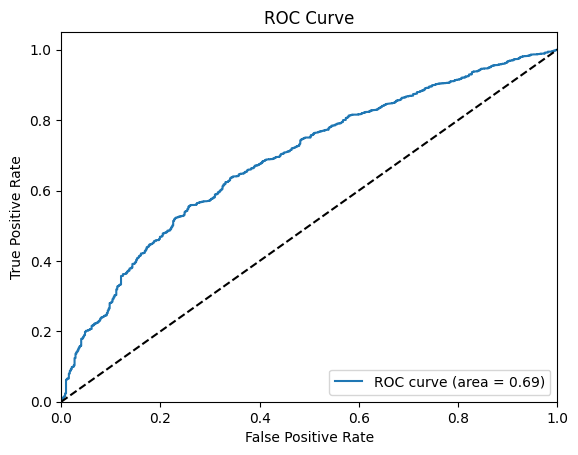

In [276]:
Hist_classifier = HistGradientBoostingClassifier(random_state=42,learning_rate=0.7,loss="log_loss")
Hist_classifier.fit(X_train, y_train)

y_pred_proba = Hist_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]
print("Best threshold:", best_threshold)

y_pred = (y_pred_proba > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.6758664955070603
Best threshold: 0.8
Confusion Matrix:
 [[ 355  168]
 [ 982 1355]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.68      0.38       523
           1       0.89      0.58      0.70      2337

    accuracy                           0.60      2860
   macro avg       0.58      0.63      0.54      2860
weighted avg       0.78      0.60      0.64      2860



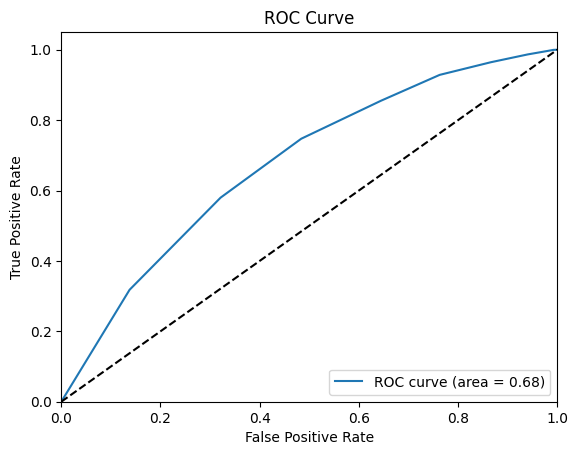

In [277]:
e_classifier = ExtraTreesClassifier(random_state=42,bootstrap=True,max_samples=0.6,n_estimators=10,criterion="gini")
e_classifier.fit(X_train, y_train)

y_pred_proba = e_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]
print("Best threshold:", best_threshold)

y_pred = (y_pred_proba > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.7091681659495472
Best threshold: 0.8064099
Confusion Matrix:
 [[ 309  214]
 [ 605 1732]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.59      0.43       523
           1       0.89      0.74      0.81      2337

    accuracy                           0.71      2860
   macro avg       0.61      0.67      0.62      2860
weighted avg       0.79      0.71      0.74      2860



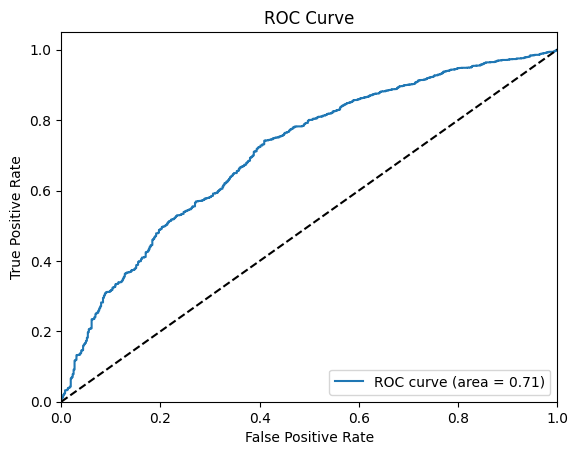

In [278]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]
print("Best threshold:", best_threshold)

y_pred = (y_pred_proba > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.7430936853395906
Best threshold: 0.7129287716427154
Confusion Matrix:
 [[ 368  155]
 [ 761 1576]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.70      0.45       523
           1       0.91      0.67      0.77      2337

    accuracy                           0.68      2860
   macro avg       0.62      0.69      0.61      2860
weighted avg       0.80      0.68      0.71      2860



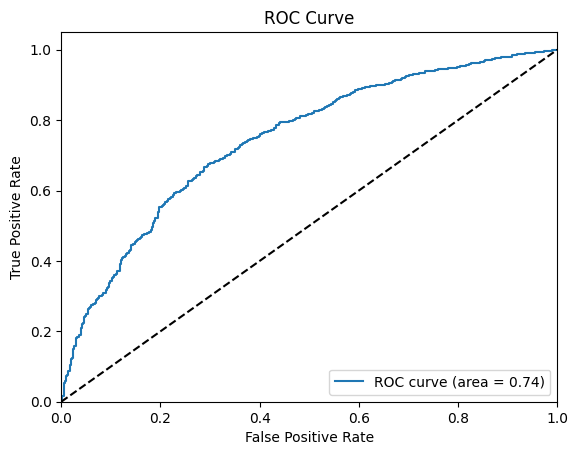

In [279]:
weights = [5, 3, 1.5, 1.5, 1.5]
voting = VotingClassifier(estimators=[
     ('lr', classifrt),
      ('svm', svm),
      ('gb_classifier', gb_classifier),
      ('Hist_classifier', Hist_classifier),
      ('e_classifier', e_classifier)
], voting='soft',
    weights=weights)

voting.fit(X_train, y_train)

y_pred_proba = voting.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

youden_index = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_index]
print("Best threshold:", best_threshold)

y_pred = (y_pred_proba > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()